### Mobile Device Usage and User Behavior Dataset

This dataset provides a comprehensive analysis of mobile device usage patterns and user behavior classification. It contains 700 samples of user data, including metrics such as app usage time, screen-on time, battery drain, and data consumption. Each entry is categorized into one of five user behavior classes, ranging from light to extreme usage, allowing for insightful analysis and modeling.

Key Features:

User ID: Unique identifier for each user.
Device Model: Model of the user's smartphone.
Operating System: The OS of the device (iOS or Android).
App Usage Time: Daily time spent on mobile applications, measured in minutes.
Screen On Time: Average hours per day the screen is active.
Battery Drain: Daily battery consumption in mAh.
Number of Apps Installed: Total apps available on the device.
Data Usage: Daily mobile data consumption in megabytes.
Age: Age of the user.
Gender: Gender of the user (Male or Female).
User Behavior Class: Classification of user behavior based on usage patterns (1 to 5).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('user_behavior_dataset.csv')

In [3]:
df.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


In [4]:
df.shape

(700, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     700 non-null    int64  
 1   Device Model                700 non-null    object 
 2   Operating System            700 non-null    object 
 3   App Usage Time (min/day)    700 non-null    int64  
 4   Screen On Time (hours/day)  700 non-null    float64
 5   Battery Drain (mAh/day)     700 non-null    int64  
 6   Number of Apps Installed    700 non-null    int64  
 7   Data Usage (MB/day)         700 non-null    int64  
 8   Age                         700 non-null    int64  
 9   Gender                      700 non-null    object 
 10  User Behavior Class         700 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 60.3+ KB


In [6]:
# Data Encoding
df = pd.get_dummies(df, columns=['Device Model'], prefix='')
df = pd.get_dummies(df, columns=['Operating System'], prefix='')
df['Gender'] = df['Gender'].map({"Male":1, "Female":0})

In [7]:
df.head()

,User ID,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class,_Google Pixel 5,_OnePlus 9,_Samsung Galaxy S21,_Xiaomi Mi 11,_iPhone 12,_Android,_iOS
0,1,393,6.4,1872,67,1122,40,1,4,True,False,False,False,False,True,False
1,2,268,4.7,1331,42,944,47,0,3,False,True,False,False,False,True,False
2,3,154,4.0,761,32,322,42,1,2,False,False,False,True,False,True,False
3,4,239,4.8,1676,56,871,20,1,3,True,False,False,False,False,True,False
4,5,187,4.3,1367,58,988,31,0,3,False,False,False,False,True,False,True


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     700 non-null    int64  
 1   App Usage Time (min/day)    700 non-null    int64  
 2   Screen On Time (hours/day)  700 non-null    float64
 3   Battery Drain (mAh/day)     700 non-null    int64  
 4   Number of Apps Installed    700 non-null    int64  
 5   Data Usage (MB/day)         700 non-null    int64  
 6   Age                         700 non-null    int64  
 7   Gender                      700 non-null    int64  
 8   User Behavior Class         700 non-null    int64  
 9   _Google Pixel 5             700 non-null    bool   
 10  _OnePlus 9                  700 non-null    bool   
 11  _Samsung Galaxy S21         700 non-null    bool   
 12  _Xiaomi Mi 11               700 non-null    bool   
 13  _iPhone 12                  700 non

In [9]:
df.corr()

,User ID,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class,_Google Pixel 5,_OnePlus 9,_Samsung Galaxy S21,_Xiaomi Mi 11,_iPhone 12,_Android,_iOS
User ID,1.000000,-0.024957,-0.014287,-0.019377,-0.023914,-0.014527,0.045188,0.019259,-0.016242,-0.005538,0.006082,0.035150,-0.039691,0.005359,-0.005359,0.005359
App Usage Time (min/day),-0.024957,1.000000,0.950333,0.956385,0.955253,0.942308,0.004382,-0.004551,0.970498,-0.009515,-0.002038,-0.012876,-0.007760,0.031577,-0.031577,0.031577
Screen On Time (hours/day),-0.014287,0.950333,1.000000,0.948983,0.946975,0.941322,0.017232,0.003573,0.964581,-0.032353,-0.004953,0.007160,0.003421,0.026470,-0.026470,0.026470
Battery Drain (mAh/day),-0.019377,0.956385,0.948983,1.000000,0.961853,0.932276,-0.002722,0.006271,0.978587,-0.030495,-0.000774,-0.012181,0.002332,0.040361,-0.040361,0.040361
Number of Apps Installed,-0.023914,0.955253,0.946975,0.961853,1.000000,0.934800,0.004034,0.016245,0.981255,-0.014483,-0.012799,0.002214,-0.014429,0.038984,-0.038984,0.038984
Data Usage (MB/day),-0.014527,0.942308,0.941322,0.932276,0.934800,1.000000,0.003999,0.023151,0.946734,-0.025254,-0.014093,0.001611,0.008359,0.028687,-0.028687,0.028687
Age,0.045188,0.004382,0.017232,-0.002722,0.004034,0.003999,1.000000,0.006965,-0.000563,-0.030057,0.016011,0.025415,-0.030608,0.020358,-0.020358,0.020358
Gender,0.019259,-0.004551,0.003573,0.006271,0.016245,0.023151,0.006965,1.000000,-0.000735,-0.005973,0.020700,0.071723,-0.055741,-0.027589,0.027589,-0.027589
User Behavior Class,-0.016242,0.970498,0.964581,0.978587,0.981255,0.946734,-0.000563,-0.000735,1.000000,-0.026838,-0.004342,-0.004342,-0.006377,0.041326,-0.041326,0.041326
_Google Pixel 5,-0.005538,-0.009515,-0.032353,-0.030495,-0.014483,-0.025254,-0.030057,-0.005973,-0.026838,1.000000,-0.244321,-0.244321,-0.258969,-0.258969,0.258969,-0.258969


In [10]:
# drop user id
df.drop('User ID', axis=1, inplace=True)

In [11]:
df.head()

,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class,_Google Pixel 5,_OnePlus 9,_Samsung Galaxy S21,_Xiaomi Mi 11,_iPhone 12,_Android,_iOS
0,393,6.4,1872,67,1122,40,1,4,True,False,False,False,False,True,False
1,268,4.7,1331,42,944,47,0,3,False,True,False,False,False,True,False
2,154,4.0,761,32,322,42,1,2,False,False,False,True,False,True,False
3,239,4.8,1676,56,871,20,1,3,True,False,False,False,False,True,False
4,187,4.3,1367,58,988,31,0,3,False,False,False,False,True,False,True


<Axes: >

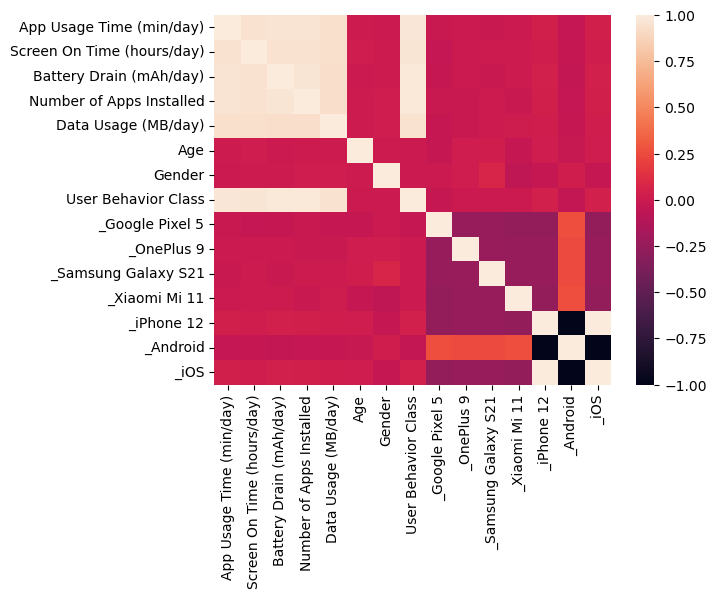

In [12]:
sns.heatmap(df.corr())

In [13]:
# as age column is not much correlated then drop this column
df.drop('Age', axis=1, inplace=True)

In [14]:
df.isnull().sum()

App Usage Time (min/day)      0
Screen On Time (hours/day)    0
Battery Drain (mAh/day)       0
Number of Apps Installed      0
Data Usage (MB/day)           0
Gender                        0
User Behavior Class           0
_Google Pixel 5               0
_OnePlus 9                    0
_Samsung Galaxy S21           0
_Xiaomi Mi 11                 0
_iPhone 12                    0
_Android                      0
_iOS                          0
dtype: int64

In [15]:
print(df['User Behavior Class'].value_counts())

User Behavior Class
2    146
3    143
4    139
5    136
1    136
Name: count, dtype: int64


In [16]:
# Split the dataset into dependent and independent features
X = df.drop('User Behavior Class', axis=1)
y = df['User Behavior Class']

In [17]:
X

,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Gender,_Google Pixel 5,_OnePlus 9,_Samsung Galaxy S21,_Xiaomi Mi 11,_iPhone 12,_Android,_iOS
0,393,6.4,1872,67,1122,1,True,False,False,False,False,True,False
1,268,4.7,1331,42,944,0,False,True,False,False,False,True,False
2,154,4.0,761,32,322,1,False,False,False,True,False,True,False
3,239,4.8,1676,56,871,1,True,False,False,False,False,True,False
4,187,4.3,1367,58,988,0,False,False,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,92,3.9,1082,26,381,1,False,False,False,False,True,False,True
696,316,6.8,1965,68,1201,1,False,False,False,True,False,True,False
697,99,3.1,942,22,457,0,True,False,False,False,False,True,False
698,62,1.7,431,13,224,1,False,False,True,False,False,True,False


In [18]:
y

0      4
1      3
2      2
3      3
4      3
      ..
695    2
696    4
697    2
698    1
699    3
Name: User Behavior Class, Length: 700, dtype: int64

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [21]:
X_train.shape

(560, 13)

In [22]:
X_test.shape

(140, 13)

In [23]:
y_train.shape

(560,)

In [24]:
y_test.shape

(140,)

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
scaler = StandardScaler()

In [27]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [28]:
X_test_scaled

array([[ 0.1699345 ,  0.38879765,  1.01947237, ..., -0.51113722,
         0.51113722, -0.51113722],
       [-1.15401886, -1.29774899, -1.40944488, ..., -0.51113722,
         0.51113722, -0.51113722],
       [-1.08726491, -1.36261617, -1.3271087 , ..., -0.51113722,
         0.51113722, -0.51113722],
       ...,
       [-0.74236949, -0.48690926, -0.4795304 , ...,  1.95642179,
        -1.95642179,  1.95642179],
       [-1.30421525, -1.16801463, -1.21450187, ..., -0.51113722,
         0.51113722, -0.51113722],
       [-0.99269681, -0.48690926, -0.98686655, ..., -0.51113722,
         0.51113722, -0.51113722]])

In [29]:
X_train_scaled

array([[ 0.31456806,  0.61583278,  1.00494246, ..., -0.51113722,
         0.51113722, -0.51113722],
       [-0.15827243,  0.19419612, -0.35118283, ..., -0.51113722,
         0.51113722, -0.51113722],
       [ 0.88753947,  0.48609842,  0.6780194 , ..., -0.51113722,
         0.51113722, -0.51113722],
       ...,
       [ 0.84859966,  0.38879765,  0.52787696, ..., -0.51113722,
         0.51113722, -0.51113722],
       [-0.93706852, -0.61664362, -0.89000046, ..., -0.51113722,
         0.51113722, -0.51113722],
       [-0.5532333 , -0.90854592, -0.73138224, ..., -0.51113722,
         0.51113722, -0.51113722]])

In [30]:
# Dimensionality Reduction
from sklearn.decomposition import PCA
pca = PCA(n_components=8)
X_train_scaled = pca.fit_transform(X_train_scaled)
X_test_scaled = pca.transform(X_test_scaled)

### Decision Tree

In [31]:
from sklearn.tree import DecisionTreeClassifier

In [42]:
tree = DecisionTreeClassifier(max_depth=4)

In [43]:
tree.fit(X_train_scaled, y_train)

DecisionTreeClassifier(max_depth=4)

In [44]:
y_train_pred = tree.predict(X_train_scaled)

In [45]:
y_train_pred

array([4, 3, 4, 2, 1, 4, 4, 5, 1, 1, 1, 1, 3, 4, 4, 1, 4, 4, 5, 3, 5, 5,
       1, 4, 2, 5, 3, 5, 3, 1, 4, 1, 5, 4, 3, 1, 4, 1, 5, 1, 3, 4, 2, 4,
       1, 3, 3, 2, 5, 4, 3, 3, 4, 1, 4, 5, 3, 4, 2, 2, 1, 1, 4, 1, 3, 3,
       1, 3, 3, 4, 5, 3, 1, 1, 3, 2, 5, 1, 1, 1, 3, 5, 3, 3, 5, 5, 1, 5,
       5, 3, 5, 3, 2, 4, 1, 4, 3, 4, 4, 5, 2, 5, 4, 1, 3, 5, 4, 1, 1, 1,
       3, 3, 1, 1, 2, 2, 5, 5, 1, 5, 3, 2, 4, 3, 3, 5, 3, 2, 5, 2, 5, 3,
       5, 3, 1, 4, 4, 4, 3, 5, 1, 1, 2, 1, 5, 2, 4, 5, 1, 2, 5, 4, 3, 3,
       5, 4, 3, 3, 1, 1, 3, 1, 4, 1, 4, 1, 4, 5, 2, 4, 2, 3, 2, 5, 5, 2,
       3, 3, 3, 2, 2, 4, 4, 3, 5, 2, 2, 2, 1, 4, 2, 2, 2, 5, 2, 5, 3, 3,
       5, 2, 1, 4, 5, 5, 3, 2, 5, 4, 1, 5, 3, 4, 1, 3, 4, 4, 4, 5, 1, 2,
       2, 3, 1, 4, 2, 3, 5, 1, 2, 5, 5, 2, 4, 5, 1, 2, 1, 2, 5, 2, 1, 3,
       1, 3, 3, 3, 1, 3, 5, 3, 5, 4, 4, 1, 4, 5, 4, 5, 4, 4, 4, 1, 5, 3,
       2, 5, 4, 4, 4, 2, 2, 4, 2, 1, 2, 3, 2, 2, 3, 3, 4, 4, 3, 3, 4, 2,
       2, 2, 2, 2, 3, 4, 3, 4, 3, 2, 2, 2, 1, 2, 4,

In [46]:
y_test_pred = tree.predict(X_test_scaled)

In [47]:
y_test_pred

array([4, 1, 1, 2, 3, 2, 2, 1, 4, 3, 1, 1, 2, 1, 3, 4, 5, 1, 3, 2, 5, 4,
       2, 4, 4, 2, 3, 5, 2, 5, 1, 3, 1, 3, 4, 5, 5, 1, 2, 2, 3, 4, 1, 3,
       2, 5, 3, 3, 1, 3, 2, 2, 2, 1, 5, 5, 3, 1, 4, 2, 3, 2, 1, 2, 5, 2,
       5, 1, 5, 5, 1, 2, 3, 2, 3, 2, 5, 4, 4, 4, 2, 1, 4, 3, 4, 4, 5, 3,
       3, 1, 1, 4, 2, 3, 4, 2, 2, 1, 3, 5, 3, 3, 1, 1, 3, 4, 5, 1, 4, 4,
       5, 4, 4, 2, 3, 2, 4, 3, 4, 3, 3, 4, 5, 4, 5, 2, 3, 5, 4, 5, 3, 3,
       1, 3, 2, 3, 5, 3, 1, 2], dtype=int64)

In [48]:
from sklearn.metrics import accuracy_score

In [49]:
# Test Accuracy
print(accuracy_score(y_test,y_test_pred ))

0.9642857142857143


In [50]:
# Training Accuracy
print(accuracy_score(y_train,y_train_pred ))

0.9928571428571429


### Naive Bias

In [51]:
from sklearn.naive_bayes import GaussianNB

In [52]:
gnb = GaussianNB()

In [53]:
gnb.fit(X_train_scaled, y_train)

GaussianNB()

In [54]:
y_train_pred = gnb.predict(X_train_scaled)

In [55]:
y_train_pred

array([4, 3, 4, 2, 1, 4, 4, 5, 1, 1, 1, 1, 3, 4, 4, 1, 4, 4, 5, 3, 5, 5,
       1, 4, 2, 5, 3, 5, 3, 1, 4, 1, 5, 4, 3, 2, 4, 1, 5, 1, 3, 4, 2, 4,
       1, 3, 3, 2, 5, 4, 3, 3, 4, 1, 4, 5, 3, 4, 2, 2, 1, 1, 4, 1, 3, 3,
       1, 3, 3, 4, 5, 3, 1, 1, 3, 2, 5, 1, 1, 1, 3, 5, 3, 3, 5, 5, 1, 5,
       5, 3, 5, 3, 2, 4, 1, 4, 3, 4, 4, 5, 2, 5, 4, 1, 3, 5, 4, 1, 1, 1,
       3, 3, 1, 1, 2, 2, 5, 5, 1, 5, 3, 2, 4, 3, 3, 5, 3, 2, 5, 2, 5, 3,
       5, 3, 1, 4, 4, 4, 3, 5, 1, 1, 2, 1, 5, 2, 4, 5, 1, 2, 5, 4, 3, 3,
       5, 4, 3, 3, 1, 1, 3, 1, 4, 1, 4, 1, 4, 5, 2, 4, 2, 3, 2, 5, 5, 2,
       3, 3, 3, 2, 2, 4, 4, 3, 5, 2, 2, 2, 1, 4, 2, 2, 2, 5, 2, 5, 3, 3,
       5, 2, 1, 4, 5, 5, 3, 2, 5, 4, 1, 5, 3, 4, 1, 3, 4, 4, 4, 5, 1, 2,
       2, 3, 1, 4, 2, 3, 5, 1, 2, 5, 5, 2, 4, 5, 1, 2, 1, 2, 5, 2, 1, 3,
       1, 3, 3, 3, 1, 3, 5, 3, 5, 4, 4, 1, 4, 5, 4, 5, 4, 4, 4, 1, 5, 3,
       2, 5, 4, 4, 4, 2, 2, 4, 2, 1, 2, 3, 2, 2, 3, 3, 4, 4, 3, 3, 4, 2,
       2, 2, 2, 2, 3, 4, 3, 4, 3, 2, 2, 2, 2, 2, 4,

In [56]:
y_test_pred = gnb.predict(X_test_scaled)

In [57]:
y_test_pred

array([4, 1, 1, 2, 3, 2, 2, 1, 4, 3, 1, 1, 2, 1, 3, 4, 5, 1, 3, 2, 5, 4,
       3, 4, 4, 2, 3, 5, 2, 5, 1, 3, 1, 3, 4, 5, 5, 1, 2, 2, 3, 4, 1, 3,
       2, 5, 3, 3, 1, 3, 2, 2, 2, 1, 5, 5, 3, 1, 4, 3, 3, 2, 1, 2, 5, 2,
       5, 1, 5, 5, 1, 2, 3, 2, 3, 2, 5, 4, 4, 4, 2, 1, 4, 3, 4, 4, 5, 3,
       3, 1, 1, 4, 2, 3, 4, 2, 2, 1, 3, 5, 3, 3, 1, 1, 3, 4, 5, 1, 4, 4,
       5, 4, 4, 2, 3, 2, 4, 3, 4, 3, 3, 4, 5, 4, 5, 2, 3, 5, 4, 5, 3, 3,
       1, 3, 2, 3, 5, 3, 1, 2], dtype=int64)

In [58]:
# Test Accuracy
print(accuracy_score(y_test,y_test_pred ))

0.9642857142857143


In [59]:
# Training Accuracy
print(accuracy_score(y_train,y_train_pred ))

0.9857142857142858


### Random Forest

In [60]:
from sklearn.ensemble import RandomForestClassifier

In [61]:
forest = RandomForestClassifier(max_depth=4)

In [62]:
forest.fit(X_train_scaled, y_train)

RandomForestClassifier(max_depth=4)

In [63]:
y_train_pred = forest.predict(X_train_scaled)

In [64]:
y_train_pred

array([4, 3, 4, 2, 1, 4, 4, 5, 1, 1, 1, 1, 3, 4, 4, 1, 4, 4, 5, 3, 5, 5,
       1, 4, 2, 5, 3, 5, 3, 1, 4, 1, 5, 4, 3, 1, 4, 1, 5, 1, 3, 4, 2, 4,
       1, 3, 3, 2, 5, 4, 3, 3, 4, 1, 4, 5, 3, 4, 2, 2, 1, 1, 4, 1, 3, 3,
       1, 3, 3, 4, 5, 3, 1, 1, 3, 2, 5, 1, 1, 1, 3, 5, 3, 3, 5, 5, 1, 5,
       5, 3, 5, 3, 2, 4, 1, 4, 3, 4, 4, 5, 2, 5, 4, 1, 3, 5, 4, 1, 1, 1,
       3, 3, 1, 1, 2, 2, 5, 5, 1, 5, 3, 2, 4, 3, 3, 5, 3, 2, 5, 2, 5, 3,
       5, 3, 1, 4, 4, 4, 3, 5, 1, 1, 2, 1, 5, 2, 4, 5, 1, 2, 5, 4, 3, 3,
       5, 4, 3, 3, 1, 1, 3, 1, 4, 1, 4, 1, 4, 5, 2, 4, 2, 3, 2, 5, 5, 2,
       3, 3, 3, 2, 2, 4, 4, 3, 5, 2, 2, 2, 1, 4, 2, 2, 2, 5, 2, 5, 3, 3,
       5, 2, 1, 4, 5, 5, 3, 2, 5, 4, 1, 5, 3, 4, 1, 3, 4, 4, 4, 5, 1, 2,
       2, 3, 1, 4, 2, 3, 5, 1, 2, 5, 5, 2, 4, 5, 1, 2, 1, 2, 5, 2, 1, 3,
       1, 3, 3, 3, 1, 3, 5, 3, 5, 4, 4, 1, 4, 5, 4, 5, 4, 4, 4, 1, 5, 3,
       1, 5, 4, 4, 4, 2, 2, 4, 2, 1, 2, 3, 2, 2, 3, 3, 4, 4, 3, 3, 4, 2,
       2, 2, 2, 2, 3, 4, 3, 4, 3, 2, 2, 2, 1, 2, 4,

In [65]:
y_test_pred = forest.predict(X_test_scaled)

In [66]:
y_test_pred

array([4, 1, 1, 2, 3, 2, 2, 1, 4, 3, 1, 1, 2, 1, 3, 4, 5, 1, 3, 2, 5, 4,
       2, 4, 4, 2, 3, 5, 2, 5, 1, 3, 1, 3, 4, 5, 5, 1, 2, 2, 3, 4, 1, 3,
       2, 5, 3, 3, 1, 3, 2, 2, 2, 1, 5, 5, 3, 1, 4, 2, 3, 2, 1, 2, 5, 2,
       5, 1, 5, 5, 1, 2, 3, 2, 3, 2, 5, 4, 4, 4, 2, 1, 4, 3, 4, 4, 5, 3,
       3, 1, 1, 4, 2, 3, 4, 2, 2, 1, 3, 5, 3, 3, 1, 1, 3, 4, 5, 1, 4, 4,
       5, 4, 4, 2, 3, 2, 4, 3, 4, 3, 3, 4, 5, 4, 5, 2, 3, 5, 4, 5, 3, 3,
       1, 3, 2, 3, 5, 3, 1, 2], dtype=int64)

In [67]:
# Test Accuracy
print(accuracy_score(y_test,y_test_pred ))

0.9642857142857143


In [68]:
# Training Accuracy
print(accuracy_score(y_train,y_train_pred ))

0.9928571428571429


In [78]:
# Predict on Given Input
print(forest.predict(pca.transform(scaler.transform([[78,	4,	789,	50	,1000,	1	,True,	False,	False,	False,	False,	True,	False]]))))

[2]


C:\Users\rpcha\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [79]:
import pickle

In [81]:
pickle.dump(forest, open('RandomForestClassifier.pkl', 'wb'))

In [ ]:
# As XGBoost classifier has high accuracy so pickle this model.
loaded_model = pickle.load(open('XGBoostClassifier.pkl', 'rb'))